# **3 Protein Separation Assignemnt**
## **Intro and instructions**
Use this Jupyter Notebook to explore the effects of changing process parameters on a theoretical 3 protein separation process.<br>
All information necessary for model configuration can be entered into this notebook and the simulation can be run from here.<br>
___

Necessary packages and scripts are imported here. (Do Not Edit)

In [1]:
import sys, os, time
import pandas as pd
from pathlib import Path
import CADET_sim, create_ms, evaluate_sim, plotting

**First, set the column parameters**<br>
col_id: Column internal diameter in centimeters<br>
col_length: Column length in centimeters<br>
Ee: Extraparticle porosity (unitless)<br>
Ep: Intraparticle porosity (unitless)<br>
particle_diameter: Particle diameter in microns<br>
pore_radius: Pore radius in nanometers<br>
ionic_cap_mM: Ionic ligand density in moles per liter of total column volume<br>

In [2]:
col_id = 1
col_length = 20
Ee = 0.4
Ep = 0.9
particle_diameter = 85
pore_radius = 32
ionic_cap_mM = 91

**Next enter the feed concentrations in mg/mL**<br>
component 1 is impurity A<br>
component 2 is the product<br>
component 3 is impurity B

In [3]:
comp1_conc = 0.4
comp2_conc = 2
comp3_conc = 0.2

**Enter the feed component molecular weights in kDa**

In [4]:
MW_1 = 36
MW_2 = 20
MW_3 = 9

**Enter the isotherm parameters for each component**

In [5]:
Keq_1 = 0.0329
steric_factor_1 = 25.5
characteristic_charge_1 = 5.2

Keq_2 = 0.0037
steric_factor_2 = 15.2
characteristic_charge_2 = 5.6

Keq_3 = 0.016
steric_factor_3 = 17
characteristic_charge_3 = 3.3

**Enter the residence time for all steps in the process in minutes**

In [6]:
residence_time = 3

**Next set the salt concentrations for each step in the process in mM.**
<br><br>
The process has 5 steps:
<br>
load - where the feed solution is loaded onto the column in binding (low salt) conditions
<br>
wash - wash buffer, typically at similar conditions to the load but containing no protein, is flowed through the column to  wash out any remaining unbound feed solution
<br>
elution step 1 - the lowest salt elution step. This step should wash out as much of the impurities that bind more weakly than the target protein as possible, without eluting the target protein.
<br>
elution step 2 - the second salt step is where the product should elute, with as little of the more strongly binding impurities as possible
<br>
elution step 3 - this step is used to wash out any of the remaining strong binding proteins from the column
<br><br>
salt is used as the mobile phase modifier in this case because we are simulating ion exchange chromatography

In [7]:
load_salt = 50
wash_salt = 50
step1_salt = 200
step2_salt = 400
step3_salt = 600

**Enter the length of each step in the process in column volumes**<br>
A typical wash or elution step length could be around 5 column volumes, but it could be less if elution happens quickly or more if the peak is very broad

In [8]:
load_CV = 5
wash_CV = 5
step1_CV = 5
step2_CV = 5
step3_CV = 5

**Finally, enter the concentration of the product species that you would like to use to determine where fraction collection begins and ends** <br>
This can be used to modulate the purity and yield of the process, but there is always a trade off between the two. For example, choosing to start fraction collection at a higher concentration may increase purity as less of the overlapping peak is collected, but this will decrease yield.

In [9]:
cutoff = 0.5

Run the following section to add all the inputs to the model

In [10]:
run_conditions = {}
           
run_conditions['load salt [mM]'] = load_salt
run_conditions['wash salt [mM]'] = wash_salt
run_conditions['step 1 salt [mM]'] = step1_salt
run_conditions['step 2 salt [mM]'] = step2_salt
run_conditions['step 3 salt [mM]'] = step3_salt
    
run_conditions['load CVs'] = load_CV
run_conditions['wash CVs'] = wash_CV
run_conditions['step 1 CVs'] = step1_CV
run_conditions['step 2 CVs'] = step2_CV
run_conditions['step 3 CVs'] = step3_CV
    
run_conditions['residence time [min]'] = residence_time
            
run_conditions['impurity A concentration [mg/mL]'] = comp1_conc
run_conditions['product concentration [mg/mL]'] = comp2_conc
run_conditions['impurity B concentration [mg/mL]'] = comp3_conc
   
run_conditions['impurity A MW'] = MW_1
run_conditions['product MW'] = MW_2
run_conditions['impurity B MW'] = MW_3

run_conditions['column ID [cm]'] = col_id
run_conditions['column length [cm]'] = col_length  
run_conditions['Ee'] = Ee
run_conditions['Ep'] = Ep
run_conditions['particle diameter [um]'] = particle_diameter
run_conditions['pore radius [nm]'] = pore_radius
run_conditions['ionic capacity [mol / L column]'] = ionic_cap_mM
    
run_conditions['Keq 1'] = Keq_1
run_conditions['steric factor 1'] = steric_factor_1
run_conditions['characteristic charge 1'] = characteristic_charge_1
    
run_conditions['Keq 2'] = Keq_2
run_conditions['steric factor 2'] = steric_factor_2
run_conditions['characteristic charge 2'] = characteristic_charge_2 
    
run_conditions['Keq 3'] = Keq_3
run_conditions['steric factor 3'] = steric_factor_3
run_conditions['characteristic charge 3'] = characteristic_charge_3

run_conditions['collection cutoff [mg/mL]'] = cutoff

ms = create_ms.create_ms(run_conditions)

Run the simulation and generate the output table and plot.
The simulation should take around 1 minute to run.


Simulation Running!

Forward Simulation Results:


,pool vol 1,pool vol 2,pool vol 3,pool C 1,pool C 2,pool C 3,yield 1,yield 2,yield 3,purity 1,purity 2,purity 3,Keq,sigma,nu,Dp,mass_bal
0,2.352,1.301,0,0.003,5.739e-01,0,0.346,3.734e+01,0.0,0.313,1.019e+01,N/A,0.033,25.5,5.2,9.654e-12,99.999
1,2.352,1.301,0,0.935,5.057e+00,0,21.995,6.581e+01,0.0,99.390,8.981e+01,N/A,0.004,15.2,5.6,1.290e-11,100.003
2,2.352,1.301,0,0.003,-5.324e-13,0,0.658,-6.929e-11,0.0,0.297,-9.455e-12,N/A,0.016,17.0,3.3,1.869e-11,100.000



 Completed in 26.7196 seconds


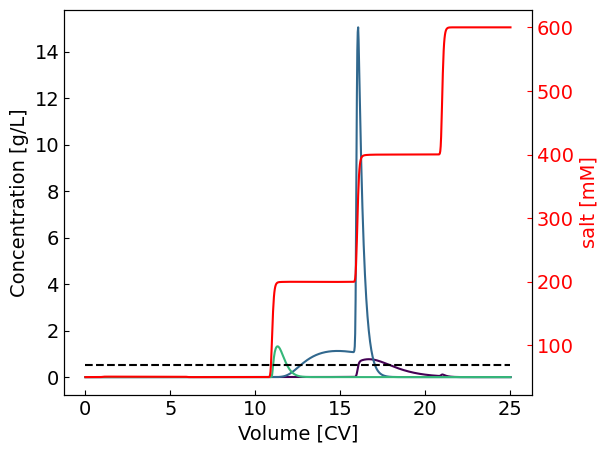

In [11]:
tic = time.perf_counter()
sim_solution = CADET_sim.run_cadet_sim(ms)

# convert time from [sec] to [min], create a [CV] column
sim_solution = evaluate_sim.process_simulation_data(sim_solution, ms) 
              
# calculates pool volume, yield, etc. and saves results as a dictionary
results = evaluate_sim.evaluate_simulation(sim_solution, ms)

print('Forward Simulation Results:')    
# Convert from list of dicts to DataFrame
results = pd.DataFrame(results)
# Print results table
with pd.option_context('display.max_rows', 5,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    display(results)
             
# Generate plots
plot = plotting.generate_plot(sim_solution, ms)  
               
# end timer and print run time
toc = time.perf_counter()
print(f'\n Completed in {toc - tic:.4f} seconds')